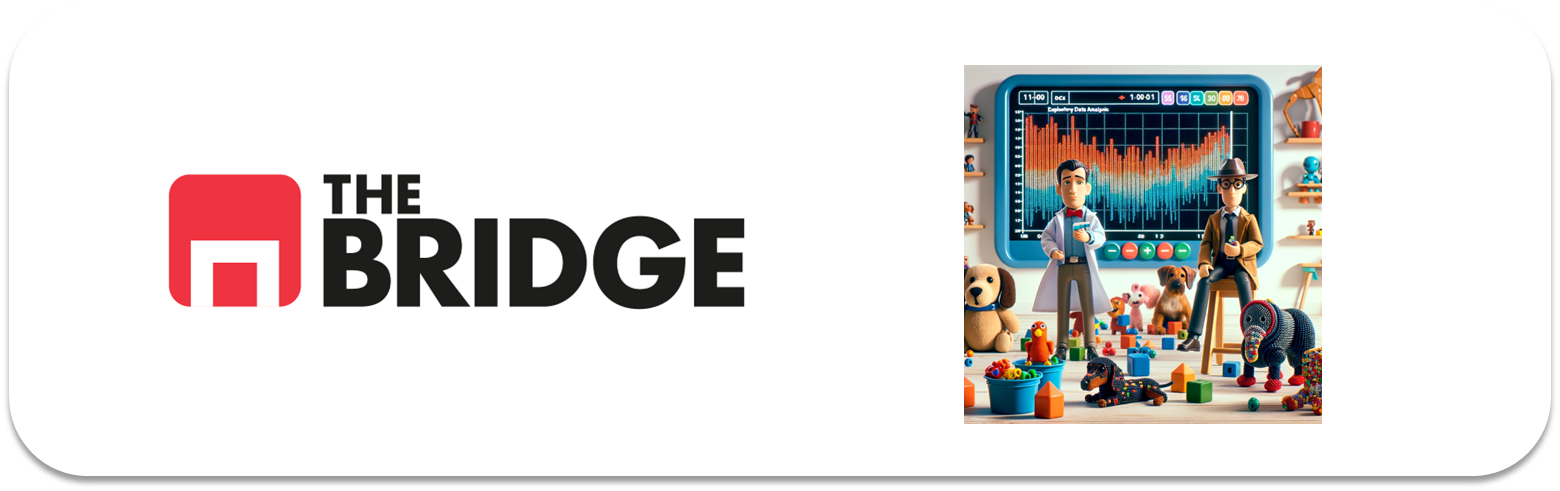

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [41]:
	import numpy as np
	import matplotlib.pyplot as plt
	import pandas as pd
	import seaborn as sns
	
	
	from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
	    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [42]:
df= pd.read_csv('./data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [43]:
df.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)
df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [44]:
df["family_members"]= df.parch + df.sibsp
df.drop(columns=["parch", "sibsp"], inplace=True)
df.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [45]:
df.loc[df.embark_town.isna(), "embark_town"] = df.embark_town.mode()[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [46]:
def media (df, tipo):
    media = df.loc[df.who == tipo, "age"].mean()
    return media


for tipo in df["who"].unique():
    df.loc[(df["age"].isna()) & (df["who"] == tipo), "age"] = media(df, tipo)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [47]:
# Lo primero que quiero hacer es clasificar las variables para entender mejor muestro dataset
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})

    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"

    return df_temp

In [48]:
df_tipo = card_tipo(df)
print(df_tipo)

               Card     %_Card     Tipo      tipo_sugerido
sex               2   0.224467   object            Binaria
age              89   9.988777  float64  Numerica discreta
fare            248  27.833895  float64  Numerica discreta
class             3     0.3367   object         Categorica
who               3     0.3367   object         Categorica
adult_male        2   0.224467     bool            Binaria
embark_town       3     0.3367   object         Categorica
alive             2   0.224467   object            Binaria
alone             2   0.224467     bool            Binaria
family_members    9   1.010101    int64         Categorica


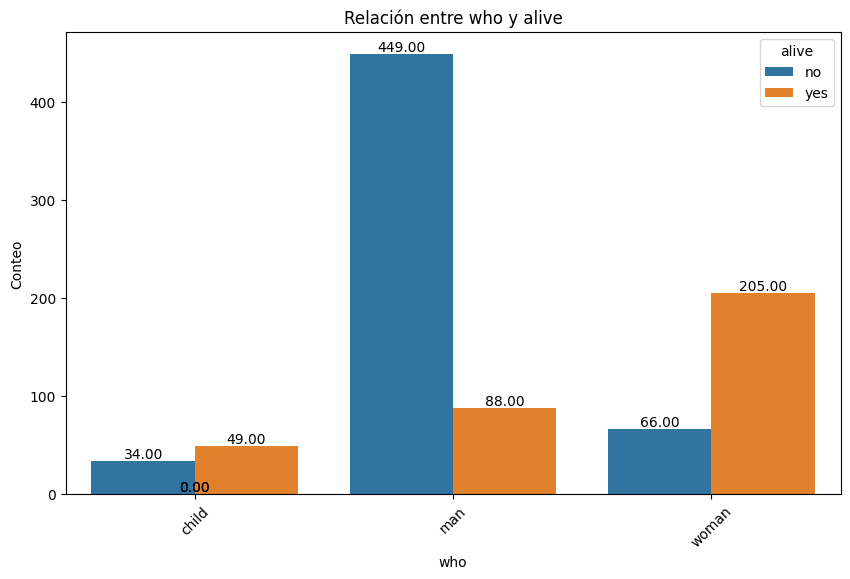

In [49]:
plot_categorical_relationship_fin(df, "who","alive", show_values= True)

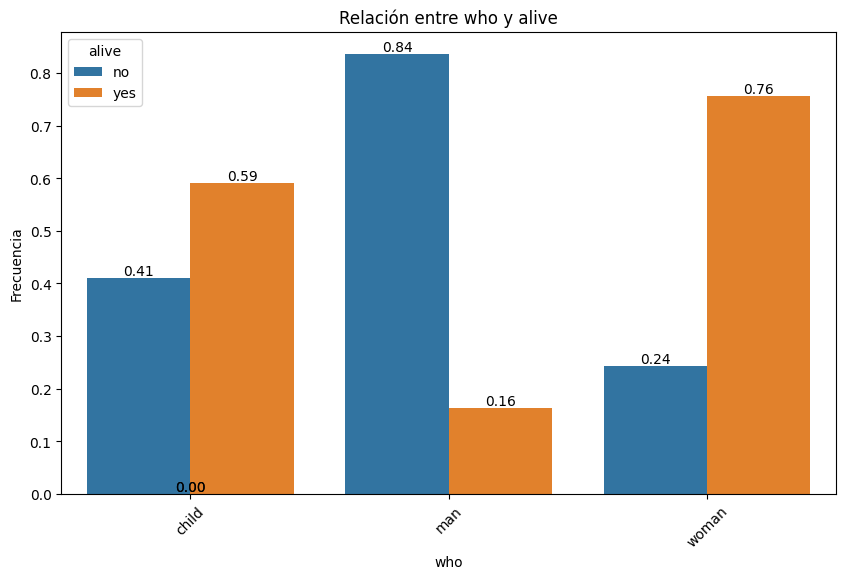

In [50]:
plot_categorical_relationship_fin(df, "who","alive", relative_freq= True, show_values= True)

In [51]:
tabla_contingencia = pd.crosstab(df["alive"],df["who"])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [52]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


**Podemos concluir:**  
1. En términos absolutos sobrevivieron más mujeres (205), hombres (88) y niños (49), por este orden.  
2. En términos relativos sorevivieron más mujeres (76%), niños (59%) y hombres (16%), por este orden.  
3. Hay una fuerte relación estadística la superviviencia y adulto frente a niño (who) o entre sexos pues tenemos un p-value excesivamente bajo. 

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [53]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta Third:


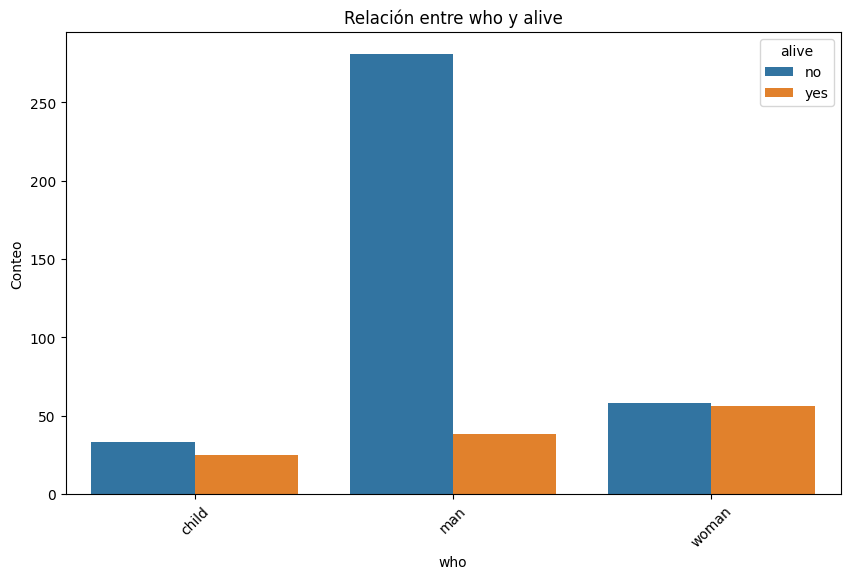

Respuesta First:


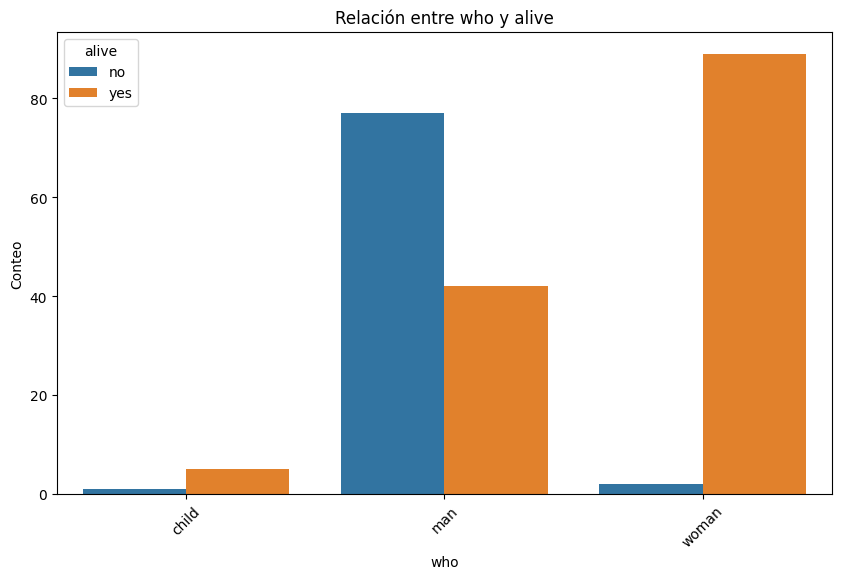

Respuesta Second:


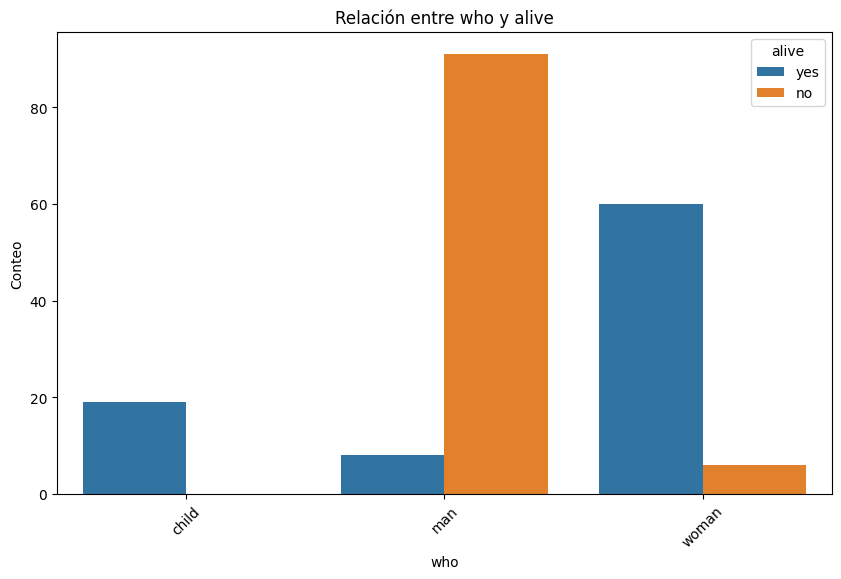

In [54]:
tricategorical_analysis(df, "class", ["alive","who"])

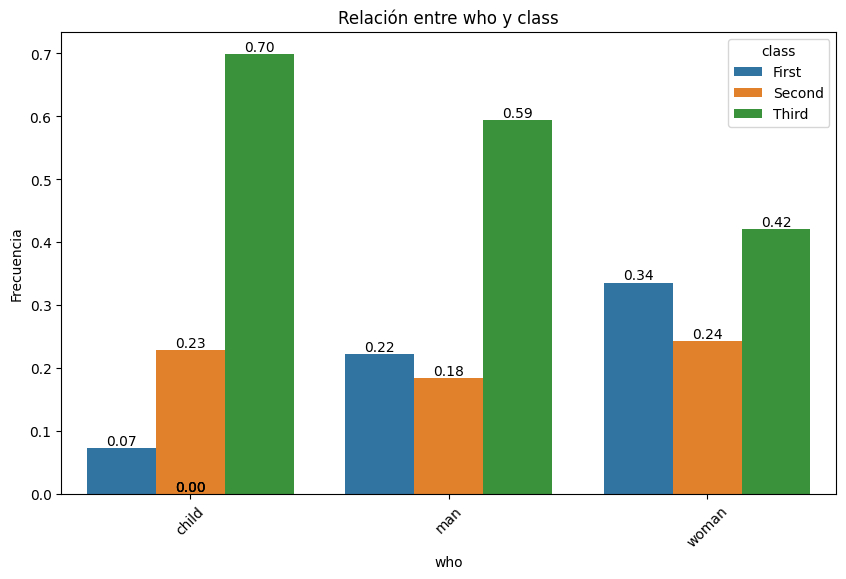

In [55]:
plot_categorical_relationship_fin(df,"who","class", relative_freq= True, show_values= True)

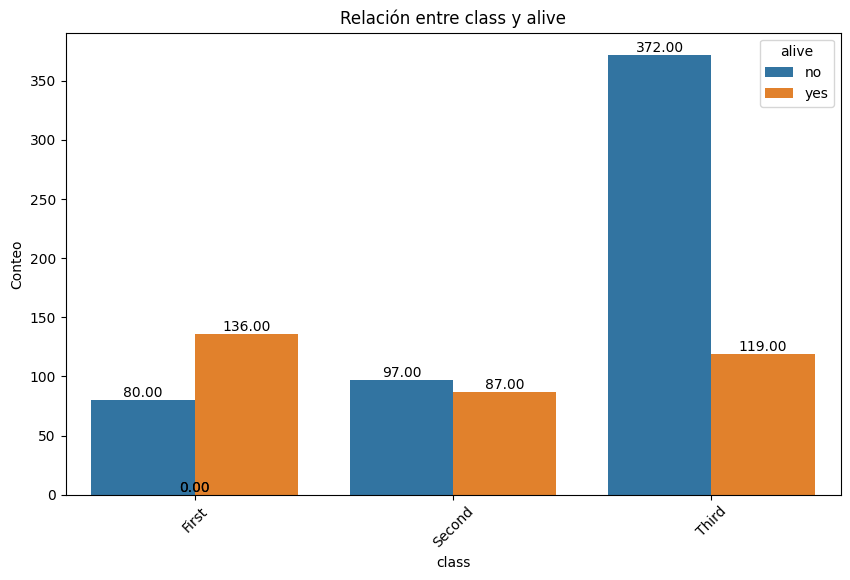

In [56]:
plot_categorical_relationship_fin(df, "class","alive", show_values = True)

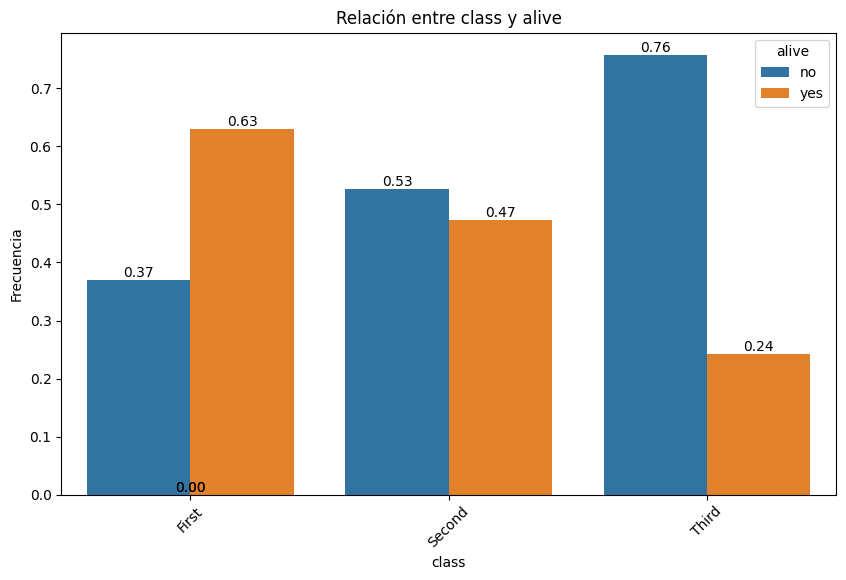

In [57]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq= True, show_values= True)

**Podemos concluir:**  
1. En términos absolutos sobrevivieron más pasajeros de 3a clase (136), luego de 1º clase (119) y finalmente de 2º clase (87).  
2. En términos relativos hay una ligera diferencia. Aumentando el ínidice de superviviencia en 3ª (con el 63%), segunda (con el 47%) y finalmente los de primera (que sólo sobrevivienron el 24%).
3. Podemos decir que el factor clase fue muy improtante a la hora de discernir el grado de supervivencia (también es una variable categórica). Pues el mayor número de niños iban en 3ºclase (70 niños) y apensas sobrevivieron unos 5).  

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

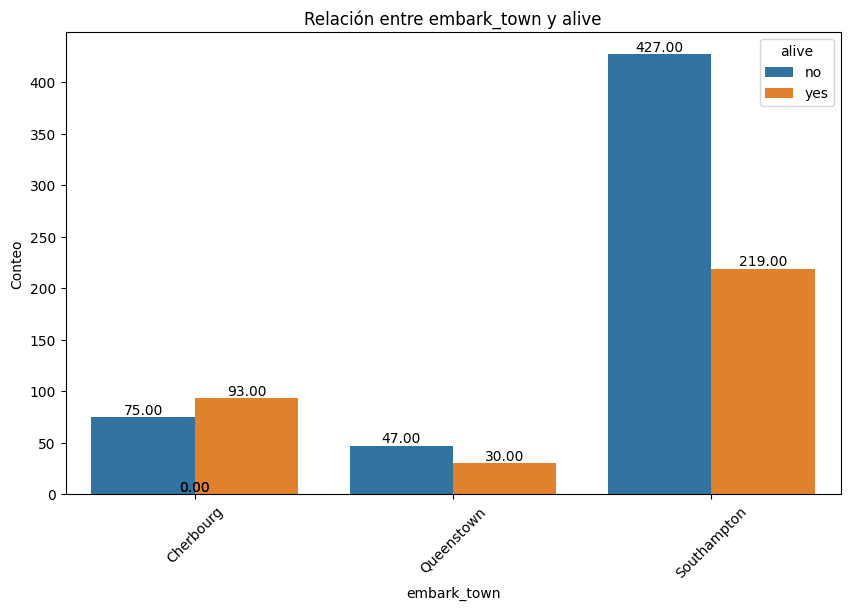

,embark_town,alive,count
0,Cherbourg,yes,93
1,Cherbourg,no,75
2,Queenstown,no,47
3,Queenstown,yes,30
4,Southampton,no,427
5,Southampton,yes,219


In [58]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True)
df.groupby("embark_town", as_index = False)["alive"].value_counts(normalize = False)

In [59]:
df.groupby("embark_town", as_index = False)["alive"].value_counts(normalize = True)

,embark_town,alive,proportion
0,Cherbourg,yes,0.553571
1,Cherbourg,no,0.446429
2,Queenstown,no,0.610390
3,Queenstown,yes,0.389610
4,Southampton,no,0.660991
5,Southampton,yes,0.339009


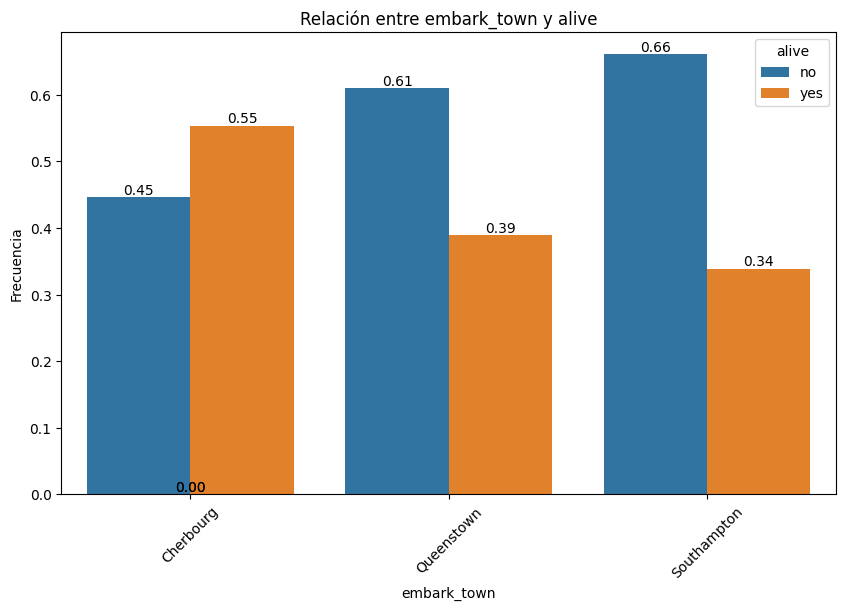

In [60]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True, relative_freq= True)

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

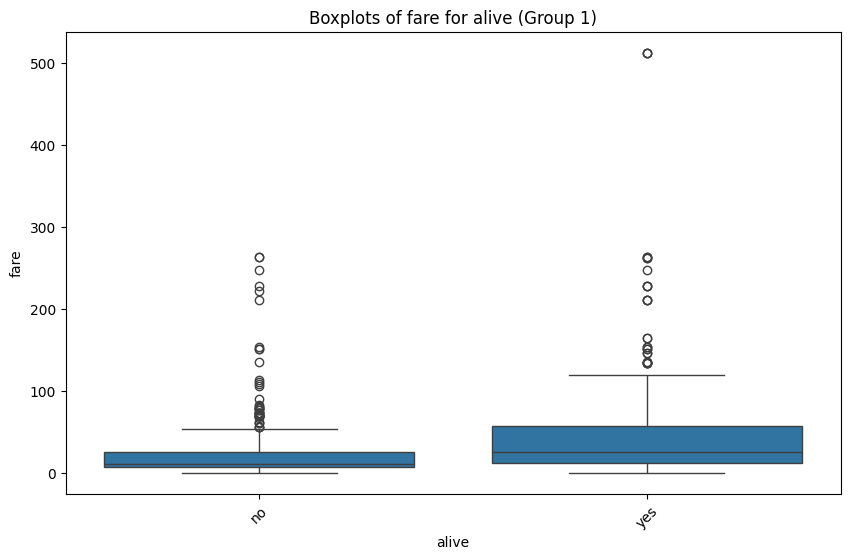

In [61]:
plot_grouped_boxplots(df,"alive","fare")

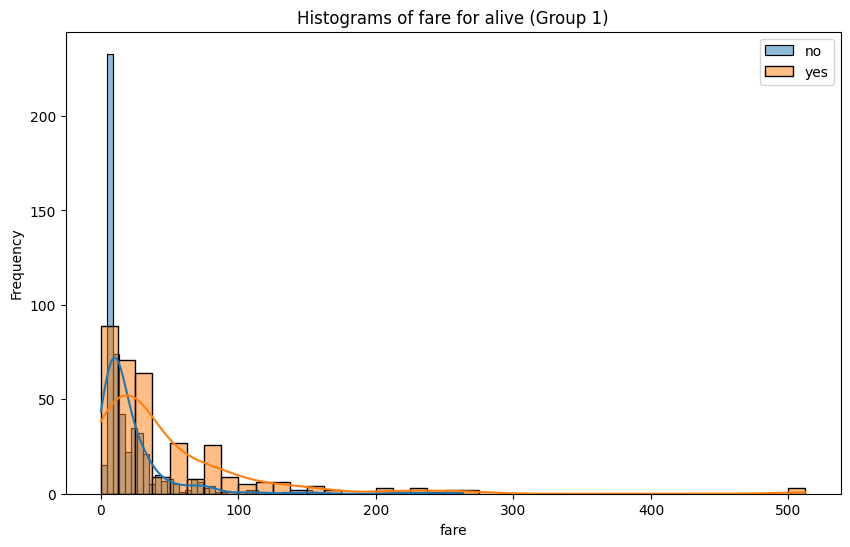

In [62]:
plot_grouped_histograms(df, "alive","fare", group_size = 2)

In [63]:
from scipy.stats import mannwhitneyu # Sí, de scipy.stats :-)

grupo_a = df.loc[df.alive == "yes"]["fare"]
grupo_b = df.loc[df.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


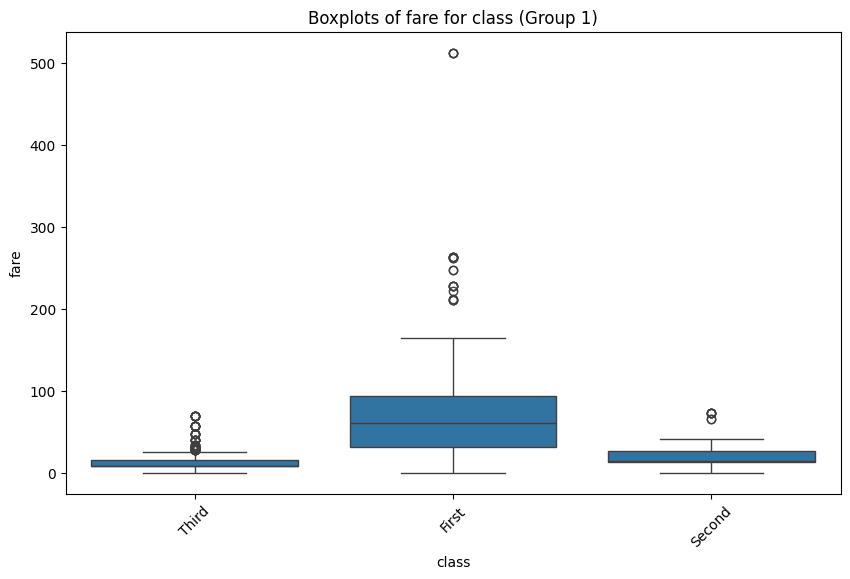

In [64]:
plot_grouped_boxplots(df,"class","fare")

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [65]:
df.loc[df.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [66]:
df.loc[df.fare == df.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [67]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size, bins = bins)

Respuesta Southampton:


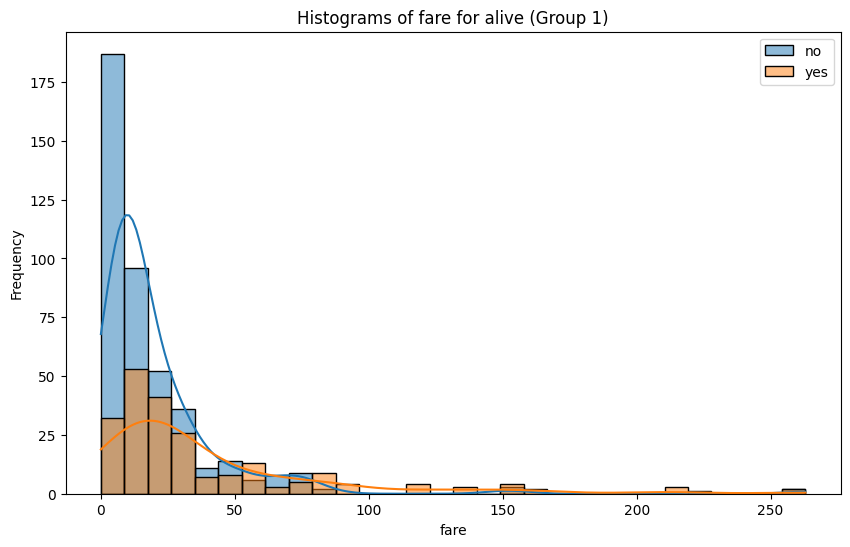

Respuesta Cherbourg:


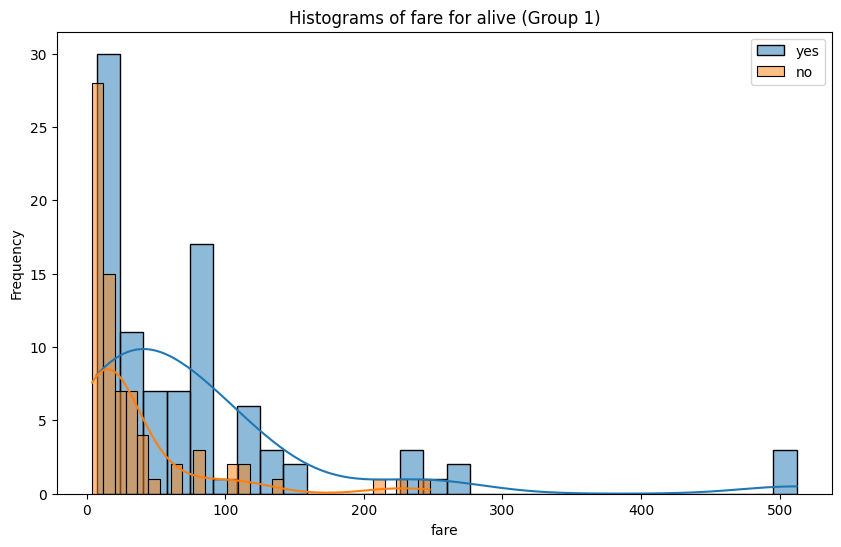

Respuesta Queenstown:


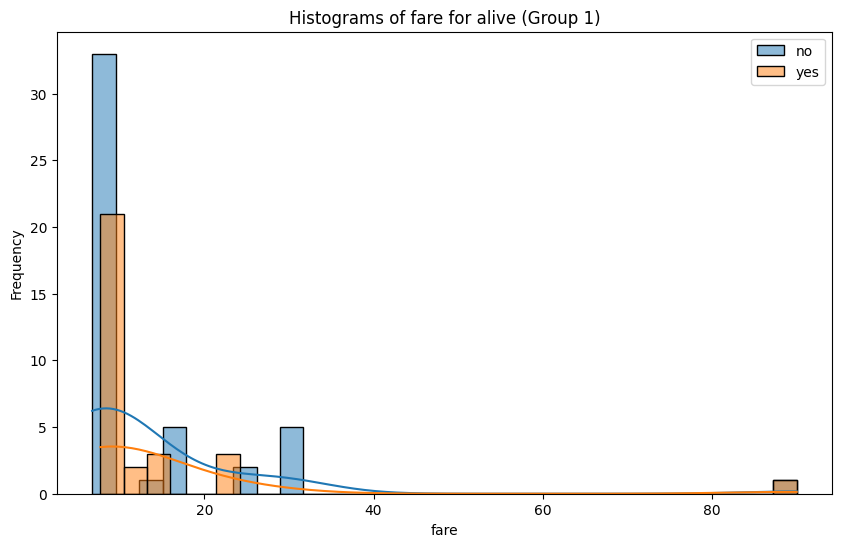

In [68]:
trivariant_analysis(df, "embark_town","alive","fare", 2, 30)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

(2,)


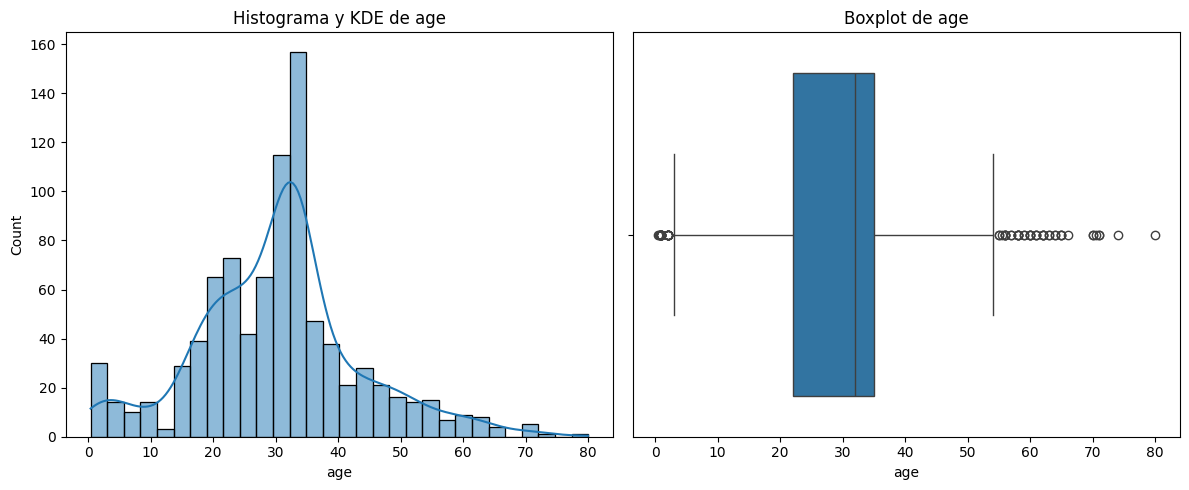

In [69]:
plot_combined_graphs(df,["age"])

In [70]:
df.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

Respuesta age_1:


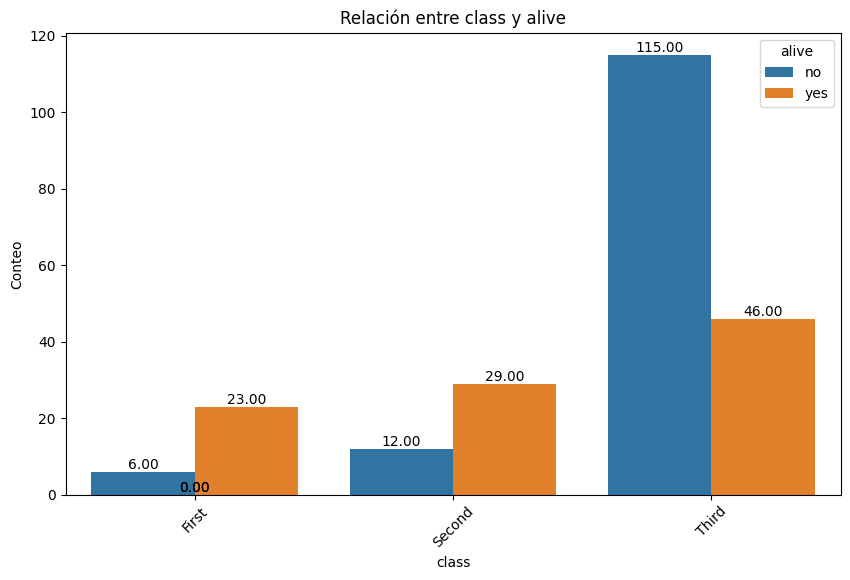

Respuesta age_4:


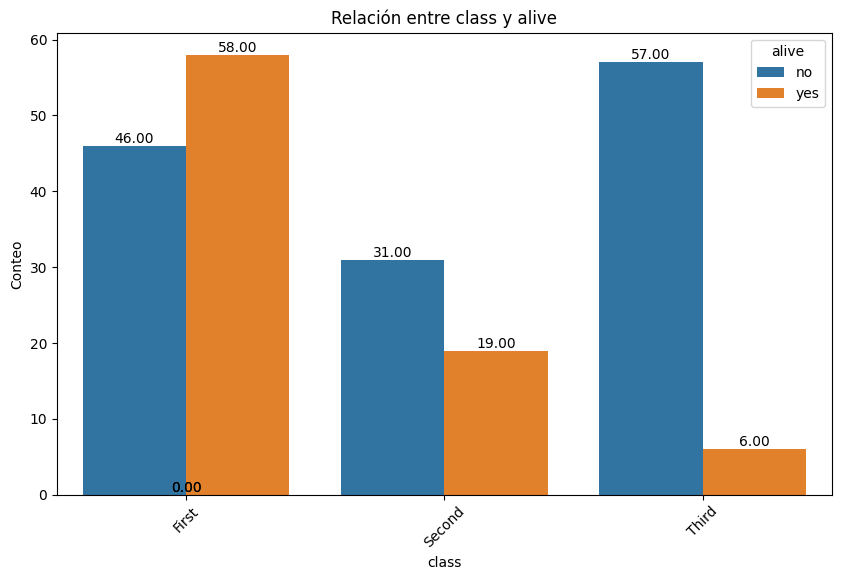

Respuesta age_2:


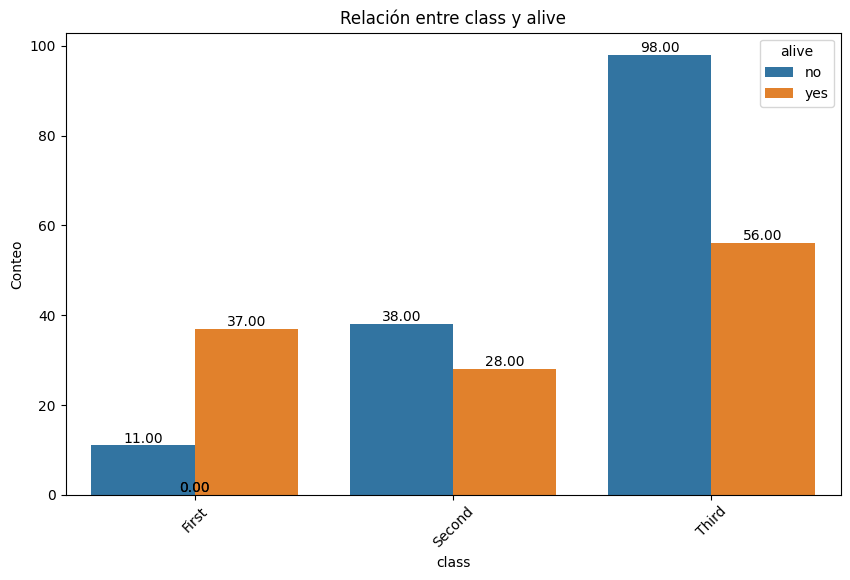

Respuesta age_3:


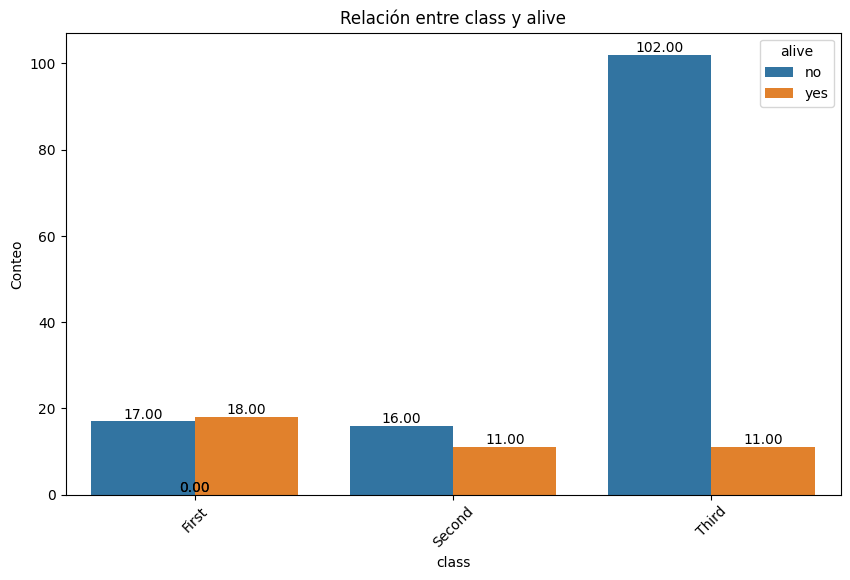

In [71]:
bins = [0,22,32,35,80]
df["cat_age"] = pd.cut(df.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

tricategorical_analysis(df = df, directora = "cat_age", otras = ["alive","class"], muestra_valores = True)

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [72]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta no:


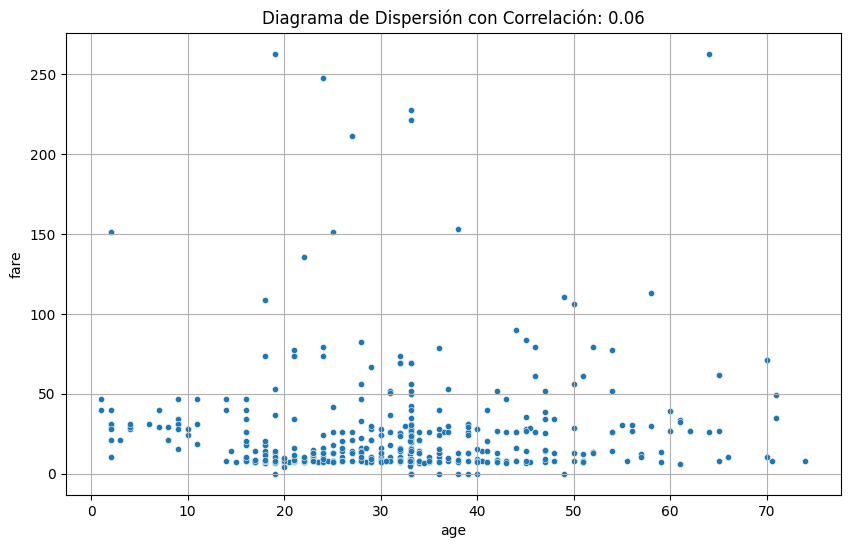

Respuesta yes:


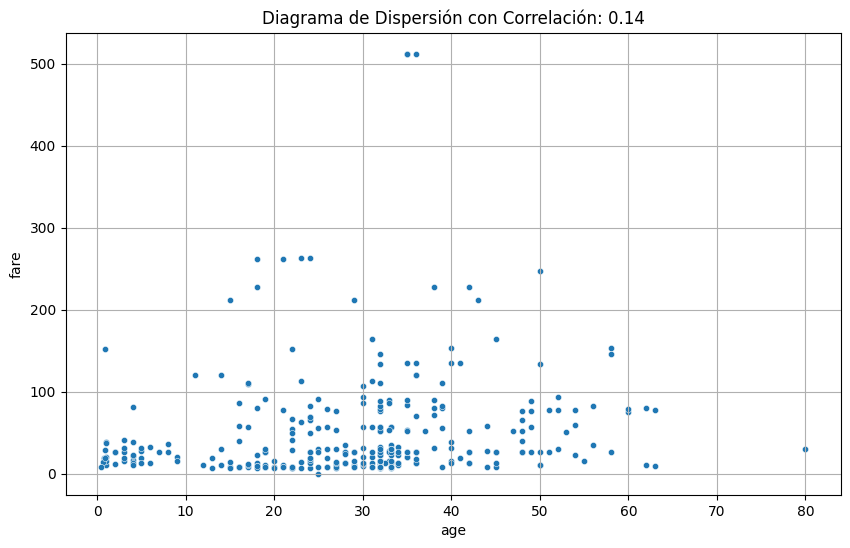

In [73]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [74]:
df=pd.read_csv('./data/dataset_viajes_jun.csv')

In [75]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    return df_temp


df_tipo = card_tipo(df)
print(df_tipo)

           Card     %_Card     Tipo      tipo_sugerido
aircompany    5   0.833333   object         Categorica
origen       11   1.833333   object  Numerica discreta
destino      11   1.833333   object  Numerica discreta
distancia    45        7.5    int64  Numerica discreta
avion         4   0.666667   object         Categorica
con_escala    2   0.333333     bool            Binaria
consumo_kg  501       83.5  float64  Numerica continua
duracion    113  18.833333    int64  Numerica discreta
ingresos    600      100.0  float64  Numerica continua
id_vuelo    347  57.833333   object  Numerica continua
mes           1        0.0   object         Categorica


aircompany: Categórica 
igresos: Numérica contínua  

Para realiar este análisis multivariable podremos aplicar  la prueba U de Mann-Whitney o ANOVA.
Nos decidimos por ANOVA en esta ocasión

In [77]:
#1 Importar librerias
from scipy import stats

In [ ]:
#2 Separamos en grupos según los valores de las categorías
grupos = df['aircompany'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
print(grupos)
ingresos_por_company = [df[df['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ingresos_por_company

['Airnar' 'FlyQ' 'TabarAir' 'MoldaviAir' 'PamPangea']


[0       14232.65
 9      110108.07
 17     518685.45
 21     799063.90
 23     432558.22
          ...    
 573    732878.07
 577    754191.00
 580    928050.52
 596     87307.63
 597    339943.47
 Name: ingresos, Length: 100, dtype: float64,
 1       468527.19
 33      273824.24
 36      235350.43
 40       25642.94
 41      417965.59
           ...    
 575     429377.42
 581    1004810.48
 589     398905.47
 590      31227.48
 598     752212.98
 Name: ingresos, Length: 108, dtype: float64,
 2      584789.19
 4      438535.07
 10     111056.67
 12     184079.01
 13      46200.30
          ...    
 572    258737.92
 582    423371.06
 587    404542.35
 593    550268.31
 599    330320.81
 Name: ingresos, Length: 142, dtype: float64,
 3       233342.51
 5       728045.68
 6        13805.52
 11      764998.83
 16      719577.55
           ...    
 578      12372.41
 579     409713.51
 583    1006880.11
 584      70674.57
 585     225493.20
 Name: ingresos, Length: 133, dtype: float64,
 7

In [82]:
#3 Aplicamos el ANOVA
f_val, p_val = stats.f_oneway(*ingresos_por_company) # El método * (igual que cuando vimos *args hace mil años) 
	                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.68687291880937
Valor p: 3.267745855663723e-12


#4 Interpretación del ANOVA  
En este caso la hipótesis nula vuelve a ser que las distribuciones de valores para cada compañía no tienen relación estadística, pero ahora como el p-value es menor que 0.05, rechazamos la hipótesis nula y reafirmamos la alternativa o contraria, es decir que **sí que los ingresos no se parecen para cada compañía** y que podemos extrapolar ese valor a otro conjunto de compañías con datos similares.


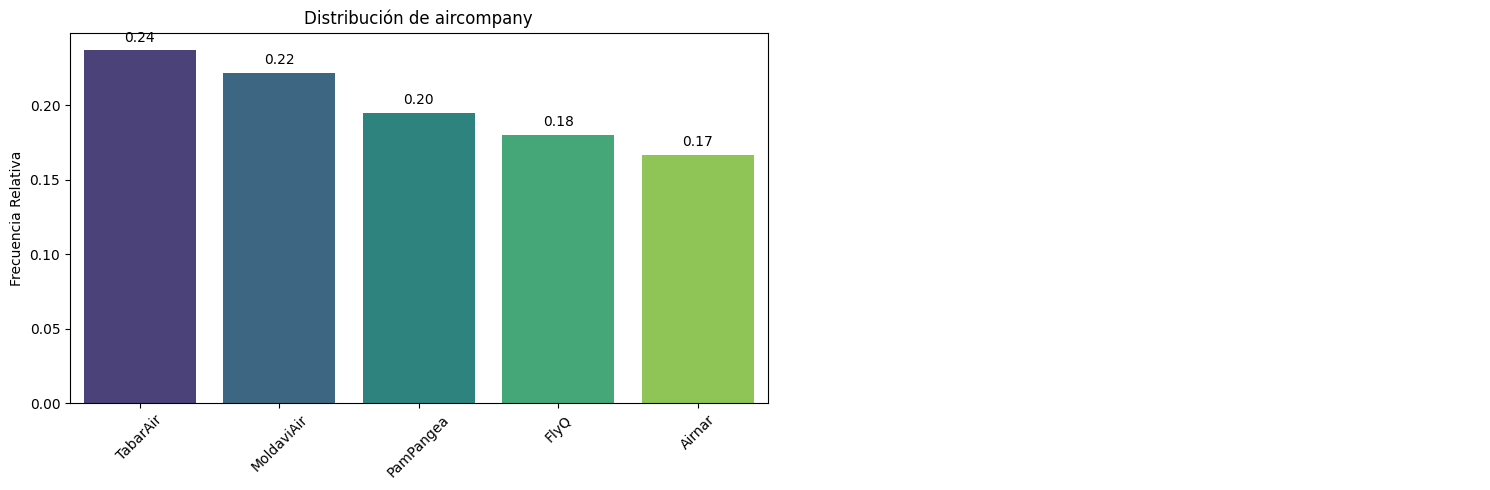

In [83]:
pinta_distribucion_categoricas(df,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


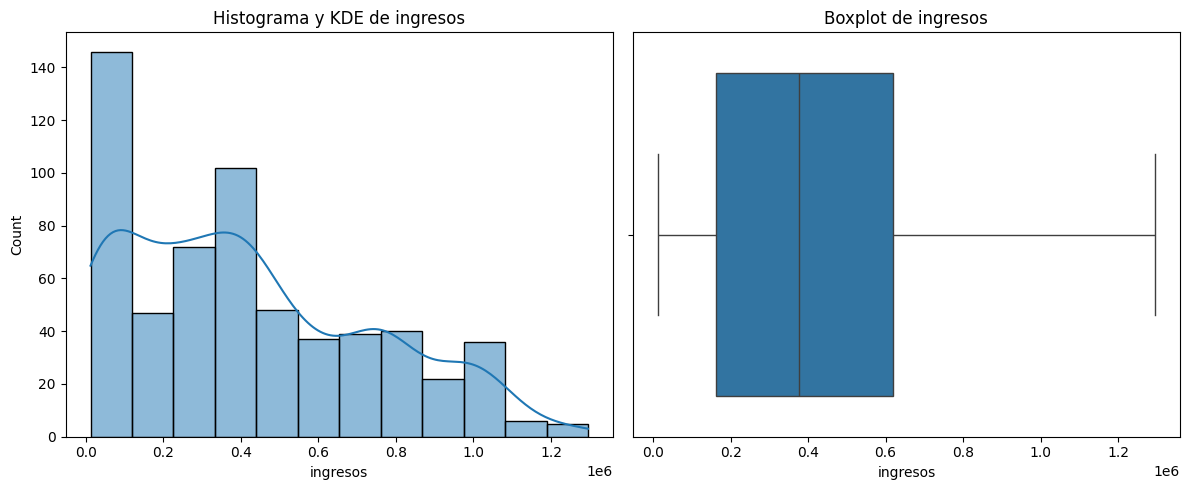

In [84]:
plot_combined_graphs(df,["ingresos"])

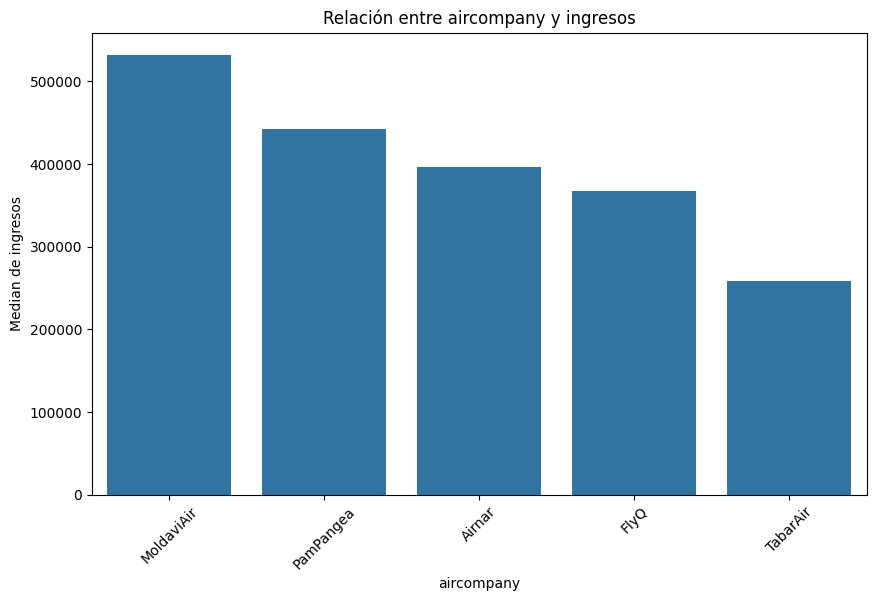

In [85]:
plot_categorical_numerical_relationship(df, "aircompany","ingresos",measure="median")

In [86]:
df.groupby("aircompany")["ingresos"].sum().sort_values()

aircompany
TabarAir      38487996.70
Airnar        40529397.82
FlyQ          43374852.87
PamPangea     55974794.70
MoldaviAir    72894268.81
Name: ingresos, dtype: float64

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

Ingresos: numérica contínua  
Distancia: Numérica discreta  
Consumo_kg: Numérica contínua  

Para realiar este análisis multivariable podremos utilizar el coeficiente o correlación de Pearson

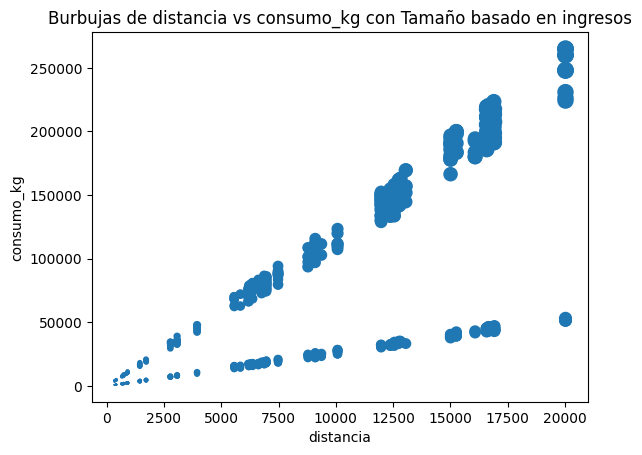

In [93]:
bubble_plot(df,"distancia","consumo_kg","ingresos", scale = 10000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


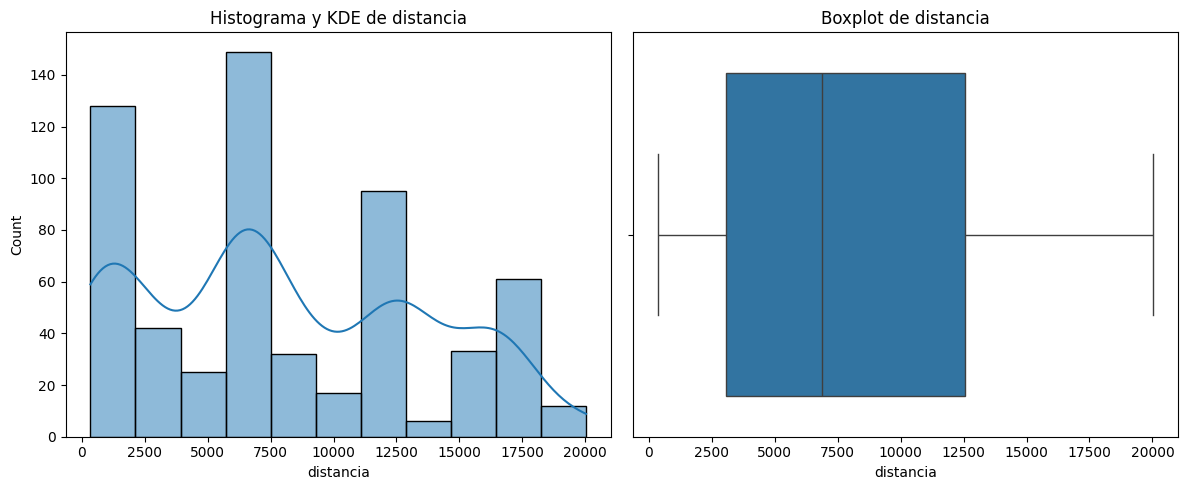

In [95]:
plot_combined_graphs(df,["distancia"])

In [102]:
df["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [100]:
df["cat_vuelo"] = pd.cut(df["distancia"], bins = [0,5500, 11000,16500, df.distancia.max()], labels = ["cat1","cat2","cat3","cat4"])
df.cat_vuelo.value_counts()

cat_vuelo
cat2    217
cat1    176
cat3    134
cat4     73
Name: count, dtype: int64

In [103]:
pd.crosstab(df["aircompany"],df["cat_vuelo"])

cat_vuelo,cat1,cat2,cat3,cat4
aircompany,,,,
Airnar,31,37,32,0
FlyQ,24,50,25,9
MoldaviAir,34,19,51,29
PamPangea,33,23,26,35
TabarAir,54,88,0,0


In [105]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta cat1:


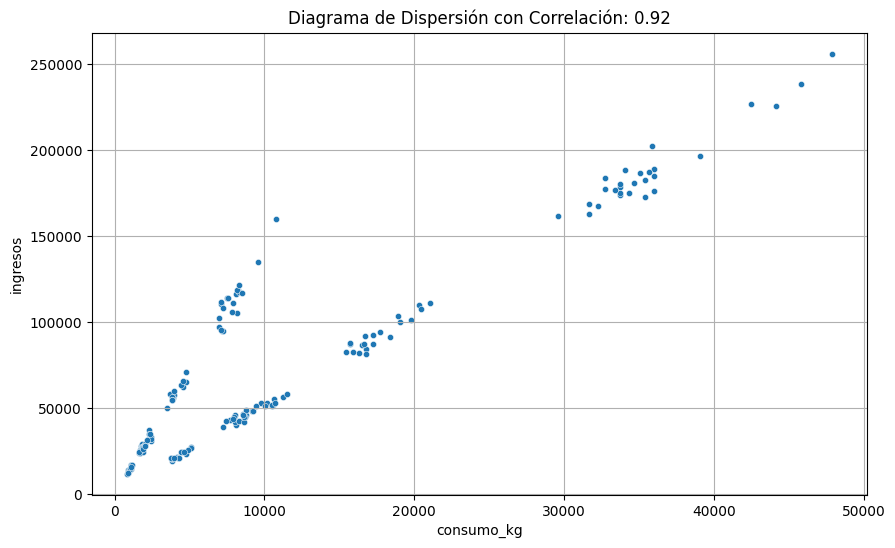

Respuesta cat3:


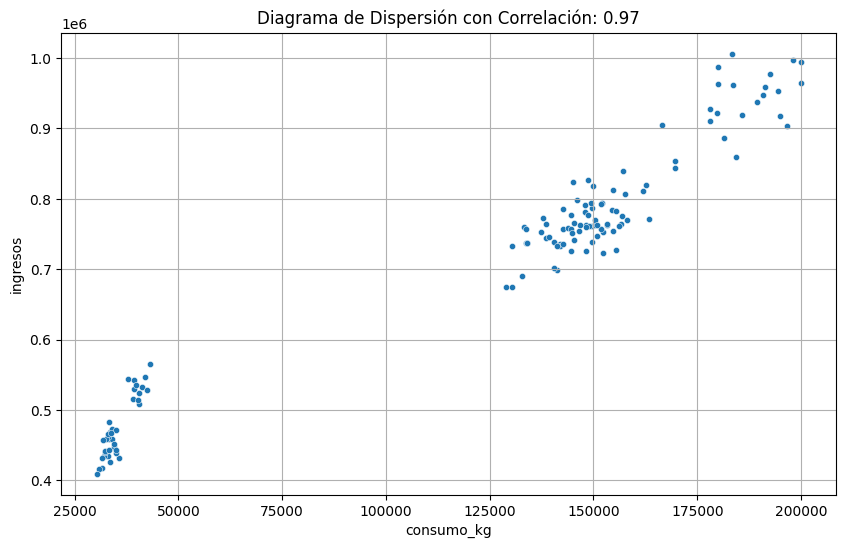

Respuesta cat2:


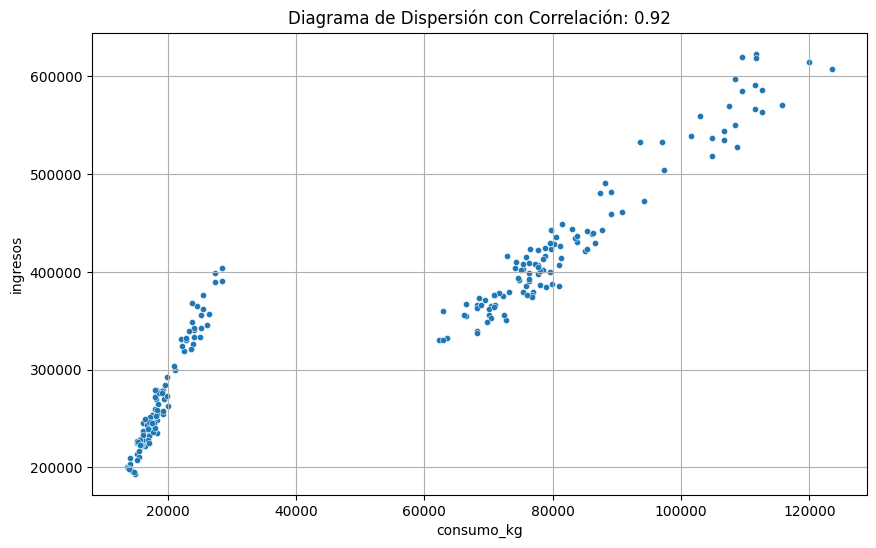

Respuesta cat4:


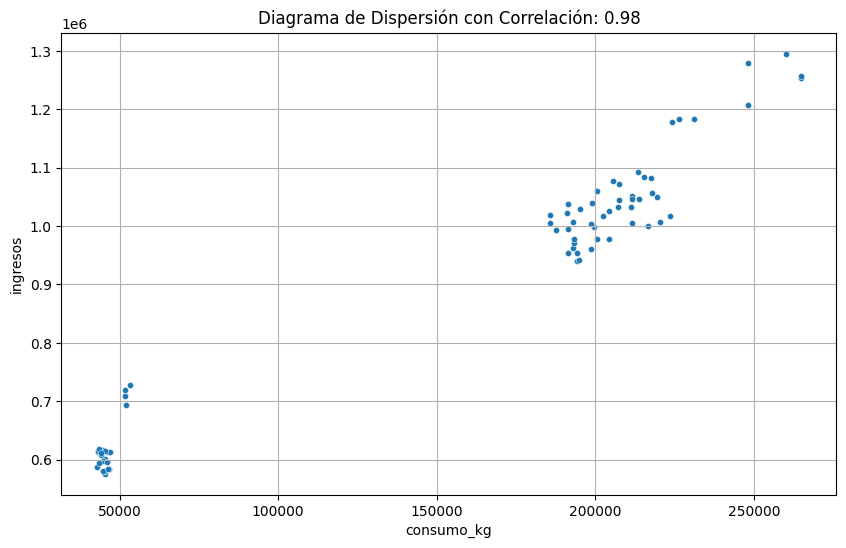

In [106]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

In [107]:
df.groupby("cat_vuelo", observed=False)["ingresos"].mean()

cat_vuelo
cat1     74065.190455
cat2    355344.844194
cat3    707025.661269
cat4    909240.651781
Name: ingresos, dtype: float64

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.